#Lab 06: Image Classification

1. Create a list with the names called image_files 


In [ ]:
from  google.colab import drive
drive.mount('/content/drive')
from datascience import * 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/img/images2')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import numpy as np 
from PIL import Image 
import math 
import pandas as pd 
from sklearn import neighbors 
from sklearn import metrics 
from sklearn.metrics import accuracy_score, recall_score, average_precision_score, confusion_matrix

In [ ]:
image_files = ['farm1.jpg', 'farm2.jpg', 'farm3.jpg', 'farm4.jpg', 'farm5.jpg', 'farm6.jpg', 'farm7.jpg', 'farm8.jpg', 'city1.jpg', 'city2.jpg', 'city3.jpg', 'city4.jpg','city5.jpg', 'city6.jpg', 'city7.jpg', 'city8.jpg', 'desert1.jpg', 'desert2.jpg', 'desert3.jpg', 'desert4.jpg', 'desert5.jpg', 'desert6.jpg', 'desert7.jpg','desert8.jpg'] 

2. Create the scatter plot in the first page


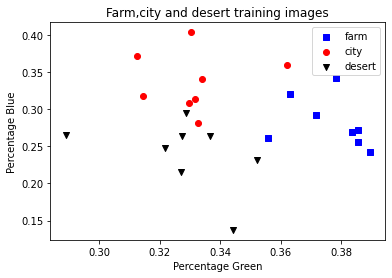

In [ ]:
green_percent=[] 
blue_percent=[] 
for i in image_files:
  img=mpimg.imread(i)     
  RGBtuple=np.array(img).mean(axis=(0,1))     
  RGBSum= RGBtuple[0]+RGBtuple[1]+RGBtuple[2]     
  green_percent.append(RGBtuple[1]/RGBSum)     
  blue_percent.append(RGBtuple[2]/RGBSum)  

green_farm=green_percent[0:8] 
green_city=green_percent[8:16] 
green_desert=green_percent[16:24]   

blue_farm=blue_percent[0:8] 
blue_city=blue_percent[8:16] 
blue_desert=blue_percent[16:24]

farm_plot= plt.scatter(green_farm,blue_farm,color="blue",marker="s") 
city_plot= plt.scatter(green_city,blue_city,color="red",marker= "o") 
desert_plot= plt.scatter(green_desert,blue_desert,color="black",marker="v")

plt.xlabel("Percentage Green") 
plt.ylabel("Percentage Blue") 
plt.title("Farm,city and desert training images") 
plt.legend((farm_plot,city_plot,desert_plot),('farm','city','desert')) 
plt.show() 

3. Now create an array of strings called training_target with the category of each.


In [ ]:
training_target=['farm', 'farm', 'farm', 'farm',  'farm', 'farm', 'farm', 'farm',  'city', 'city', 'city', 'city',  'city', 'city', 'city', 'city',  'desert', 'desert', 'desert', 'desert',  'desert', 'desert', 'desert', 'desert']


4. Create an empty array of zeros called training_data that will eventually store the percent green and percent blue values.


In [ ]:
training_data=np.zeros((24, 2)) 
training_data 

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

5. Now fill the training_data array with the proper values for each image, and observe the values in the array after it is finished.

In [ ]:
training_data=np.array((green_percent,blue_percent)) 
training_data

array([[ 0.38537916,  0.38947877,  0.37176749,  0.38534941,  0.38368854,
         0.37822351,  0.35577841,  0.36318264,  0.33384679,  0.31457989,
         0.32982159,  0.33021422,  0.31267745,  0.3620055 ,  0.33263931,
         0.33155648,  0.28899154,  0.32887465,  0.32171351,  0.35209261,
         0.32718513,  0.33655681,  0.34419192,  0.32732039],
       [ 0.27250258,  0.2416675 ,  0.2923693 ,  0.25567274,  0.26974449,
         0.34243724,  0.26138973,  0.32079251,  0.33987008,  0.31740955,
         0.30761097,  0.40329483,  0.37068047,  0.35922372,  0.28122414,
         0.31387494,  0.26478622,  0.29461288,  0.24749944,  0.23171261,
         0.21564911,  0.2638719 ,  0.13749538,  0.26438328]])

In [ ]:
training_data_list=[] 
for i in range(24):         
  training_data_list.append((green_percent[i],blue_percent[i])) 
training_data=np.array(training_data_list) 
training_data

array([[ 0.38537916,  0.27250258],
       [ 0.38947877,  0.2416675 ],
       [ 0.37176749,  0.2923693 ],
       [ 0.38534941,  0.25567274],
       [ 0.38368854,  0.26974449],
       [ 0.37822351,  0.34243724],
       [ 0.35577841,  0.26138973],
       [ 0.36318264,  0.32079251],
       [ 0.33384679,  0.33987008],
       [ 0.31457989,  0.31740955],
       [ 0.32982159,  0.30761097],
       [ 0.33021422,  0.40329483],
       [ 0.31267745,  0.37068047],
       [ 0.3620055 ,  0.35922372],
       [ 0.33263931,  0.28122414],
       [ 0.33155648,  0.31387494],
       [ 0.28899154,  0.26478622],
       [ 0.32887465,  0.29461288],
       [ 0.32171351,  0.24749944],
       [ 0.35209261,  0.23171261],
       [ 0.32718513,  0.21564911],
       [ 0.33655681,  0.2638719 ],
       [ 0.34419192,  0.13749538],
       [ 0.32732039,  0.26438328]])

6. Create your classifier. 


In [ ]:
k1 = neighbors.KNeighborsClassifier(n_neighbors=1, weights='distance') 

7. Train your classifier. 


In [ ]:
k1.fit(training_data, training_target) 

KNeighborsClassifier(n_neighbors=1, weights='distance')

8. Now create an empty test_data array and fill it with the proper values for each test image,

In [ ]:
test_image_files=['test1.jpg','test2.jpg','test3.jpg'] 
test_result_predict=['city','desert','farm']  
green_percent_test=[] 
blue_percent_test=[] 
for image in test_image_files:     
  img=mpimg.imread(image)     
  RGBtuple= np.array(img).mean(axis=(0,1))     
  RGBSum= RGBtuple[0]+RGBtuple[1]+RGBtuple[2]     
  green_percent_test.append(RGBtuple[1]/RGBSum)     
  blue_percent_test.append(RGBtuple[2]/RGBSum)

In [ ]:
test_data=np.zeros((3,2)) 
test_data

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [ ]:
test_data_list=[] 
for i in range(3):     
  test_data_list.append((green_percent_test[i],blue_percent_test[i])) 
test_data=np.array(test_data_list) 
test_data

array([[ 0.3269592 ,  0.32688513],
       [ 0.33429384,  0.17936789],
       [ 0.35004008,  0.24578861]])

9. Predict the class of the test images.

In [ ]:
k1_pred = k1.predict(test_data) 
k1_pred

array(['city', 'desert', 'desert'],
      dtype='<U6')

10. Print the prediction from the test images and compare with the actual images shown below. Make this comparison clear in the output of your code (e.g. prepend with ‘predicted:’ and ‘actual:’). Try to explain any errors if you note any.

In [ ]:
for i in range(3):     
  print("The actual value :",test_result_predict[i])     
  print("The predicted value :",k1_pred[i])

print('test3.jpg is a bit small so its hard to predict the above output')

The actual value : city
The predicted value : city
The actual value : desert
The predicted value : desert
The actual value : farm
The predicted value : desert
test3.jpg is a bit small so its hard to predict the above output


In [ ]:
training_data = [  [1, 22, 0],
  [3, 45, 1],
  [2, 32, 0],
  [1, 38, 1],
  [3, 27, 0],
  [2, 29, 1],
  [1, 56, 1],
  [3, 18, 0],
  [2, 21, 0],
  [3, 35, 1]
]

training_target = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
